Code for the testing and development of group_linear_regression_boot_strap

In [1]:
%load_ext autoreload
%autoreload 2

In [26]:
import matplotlib.pyplot as plt
import numpy as np

from janelia_core.stats.regression import grouped_linear_regression_boot_strap
from janelia_core.stats.regression import grouped_linear_regression_boot_strap_stats

## Parameters go here

In [38]:
# Coefficients of the true model here
coefs = np.asarray([1.0, 3.0, 0.0, 4.0, 5.0])

# True model mean here
mn = 7.0

# Number of groups to sample
n_grps = 100

# Range of the number of samples to generate from each group
n_smps_per_group = [1, 5]


## Generate true data

In [4]:
n_coefs = len(coefs)

x_grp = [None]*n_grps
y_grp = [None]*n_grps
i_grp = [None]*n_grps

for g_i in range(n_grps):
    n_grp_smps = np.random.randint(n_smps_per_group[0], n_smps_per_group[1] + 1)
    
    
    x_base = np.random.randn(1, n_coefs)
    x_add = .1*np.random.randn(n_grp_smps, n_coefs)
    x_grp[g_i] = x_base + x_add
    
    y_grp[g_i] = np.matmul(x_grp[g_i], coefs) + np.random.randn(n_grp_smps) + mn

    i_grp[g_i] = np.ones(n_grp_smps)*g_i
    
x = np.concatenate(x_grp)
y = np.concatenate(y_grp)
grps = np.concatenate(i_grp)

In [5]:
results = grouped_linear_regression_boot_strap(x=x, y=y, g=grps, n_bs_smps=10000)

In [6]:
stats = grouped_linear_regression_boot_strap_stats(results[0], alpha=.01)

In [7]:
stats

{'alpha': 0.01,
 'c_ints': array([[ 0.84583538,  2.87920586, -0.27283673,  3.82644203,  4.81409744,
          6.97980852],
        [ 1.15857362,  3.16443717,  0.05833783,  4.15211389,  5.19520414,
          7.2875841 ]]),
 'non_zero_p': array([0.0002, 0.0002, 0.08  , 0.0002, 0.0002, 0.0002]),
 'non_zero': array([ True,  True, False,  True,  True,  True])}

# Code to look at distribution of p-values when null hypothesis is true

In [49]:
coefs = np.asarray([0.0, 3.0, 0.0, 0.0, 0.0])
mn = 2.0
n_sims = 1000

In [50]:
p_values = np.zeros([n_sims, len(coefs)+1])

In [51]:
for s_i in range(n_sims):
    n_coefs = len(coefs)

    x_grp = [None]*n_grps
    y_grp = [None]*n_grps
    i_grp = [None]*n_grps

    for g_i in range(n_grps):
        n_grp_smps = np.random.randint(n_smps_per_group[0], n_smps_per_group[1] + 1)
    
    
        x_base = np.random.randn(1, n_coefs)
        x_add = .1*np.random.randn(n_grp_smps, n_coefs)
        x_grp[g_i] = x_base + x_add
    
        y_grp[g_i] = np.matmul(x_grp[g_i], coefs) + np.random.randn(n_grp_smps) + mn

        i_grp[g_i] = np.ones(n_grp_smps)*g_i
    
    x = np.concatenate(x_grp)
    y = np.concatenate(y_grp)
    grps = np.concatenate(i_grp)
    
    results = grouped_linear_regression_boot_strap(x=x, y=y, g=grps, n_bs_smps=10000)
    stats = grouped_linear_regression_boot_strap_stats(results[0], alpha=.01)
    p_values[s_i,:] = stats['non_zero_p']
    if s_i % 100 == 0:
        print('Done with simulation ' + str(s_i))

Done with simulation 0
Done with simulation 100
Done with simulation 200
Done with simulation 300
Done with simulation 400
Done with simulation 500
Done with simulation 600
Done with simulation 700
Done with simulation 800
Done with simulation 900


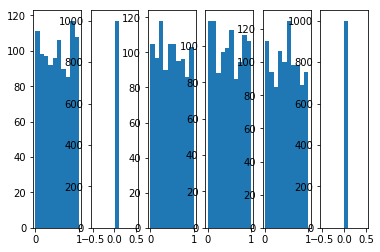

In [52]:
n_vls = p_values.shape[1]
for i in range(p_values.shape[1]):
    plt.subplot(1, n_vls, i+1)
    plt.hist(p_values[:, i])